In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [62]:
# Count the number of 'ham' and 'spam' emails
class_counts = df['Category'].value_counts()

# Display the counts
print("Email Category Counts:")
print(class_counts)

Email Category Counts:
Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


In [43]:
# Encode Labels (Spam -> 1, Ham -> 0)
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])  # Add encoded labels as a new column
print("\nDataset with Encoded Labels:")
print(df.head())


Dataset with Encoded Labels:
  Category                                            Message  label_encoded  \
0      ham  Go until jurong point, crazy.. Available only ...              0   
1      ham                      Ok lar... Joking wif u oni...              0   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...              1   
3      ham  U dun say so early hor... U c already then say...              0   
4      ham  Nah I don't think he goes to usf, he lives aro...              0   

   Category_encoded  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [45]:
# Split Features and Labels
messages = df['Message'].values
labels = df['Category_encoded'].values

In [46]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=0.2, random_state=42)

In [47]:
# Tokenization and Padding
max_words = 10000  # Maximum number of words in the vocabulary
max_len = 100      # Maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [48]:
# Display tokenized word index
print("\nWord Index Mapping (Tokenization):")
for word, index in list(tokenizer.word_index.items())[:10]:  # Show the first 10 word mappings
    print(f"{word}: {index}")


Word Index Mapping (Tokenization):
i: 1
to: 2
you: 3
a: 4
the: 5
u: 6
and: 7
in: 8
is: 9
me: 10


In [49]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [50]:
# Build RNN Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=32, input_length=max_len),
    SimpleRNN(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [51]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8245 - loss: 0.4452 - val_accuracy: 0.8643 - val_loss: 0.3537
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8835 - loss: 0.2861 - val_accuracy: 0.9798 - val_loss: 0.0921
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9934 - loss: 0.0451 - val_accuracy: 0.9809 - val_loss: 0.0644
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9969 - loss: 0.0214 - val_accuracy: 0.9798 - val_loss: 0.0731
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9989 - loss: 0.0099 - val_accuracy: 0.9843 - val_loss: 0.0581
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9992 - loss: 0.0061 - val_accuracy: 0.9798 - val_loss: 0.0694
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9798 - val_loss: 0.0717
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accu

In [52]:
# Evaluate the Model
y_pred_probs = model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype("int32")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [58]:
# Verify the unique classes in y_test and y_pred
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred.flatten()))  # Flatten for unique values

# Adjust the classification report
classification_rep = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print("\nClassification Report:\n", classification_rep)


Unique classes in y_test: {0, 1}
Unique classes in y_pred: {0, 1}

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       958
        spam       1.00      0.90      0.95       157

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



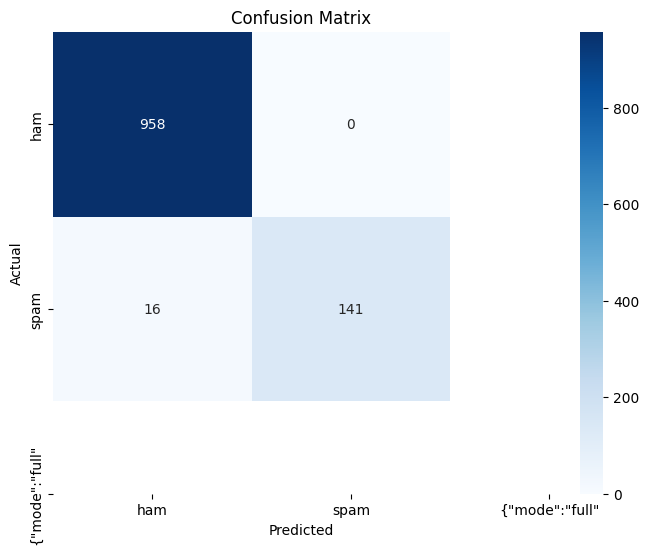

In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

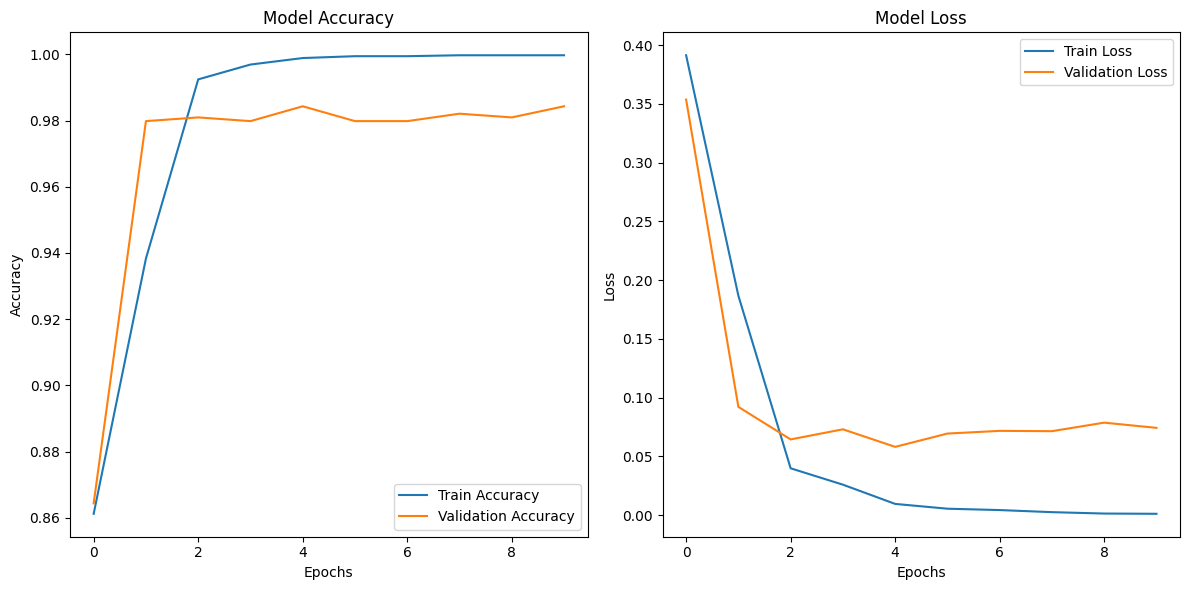

In [60]:
# Accuracy and Loss Graphs
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
emails_to_test = [
    "Hi, are we still on for lunch tomorrow?",  # Ham example
    "Congratulations! You've won a $1,000 gift card. Claim now!"  # Spam example
]

for email in emails_to_test:
    email_sequence = tokenizer.texts_to_sequences([email])
    email_padded = pad_sequences(email_sequence, maxlen=max_len)
    prediction = model.predict(email_padded)[0][0]
    predicted_label = 'ham' if prediction < 0.5 else 'spam'
    print(f"Email: {email}")
    print(f"Predicted Category: {predicted_label} (Confidence: {prediction:.2f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Email: Hi, are we still on for lunch tomorrow?
Predicted Category: ham (Confidence: 0.00)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Email: Congratulations! You've won a $1,000 gift card. Claim now!
Predicted Category: spam (Confidence: 0.99)

